## Optical Character Recognition using Sklearn and Logistic Regression

In this experiment, I will demonstrate how Sklearn can help recognize Optical Character Recognition(OCR) - that is, recognizing Handwritten Digits
The problem essentially involves location and identifying the characters in the image. We will use Sklearn's pre-formatted digits to identify these numbers.

## Motivation

The motivation of doing this sample project was to understand the working ok Sklearn's Digits dataset and how pixel values can help us recognize the digits

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [3]:
#Default packages needed for this project
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

In [1]:
#After executing this, we will finout that Sklearn has 1797 n_sample digits and 8 n_features
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

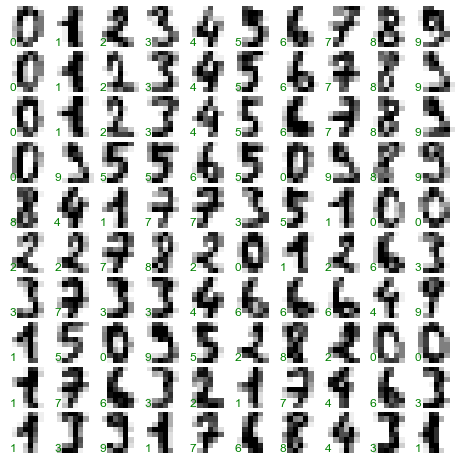

In [4]:
#We will now plot some of the digits to see how it really looks like
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In the above sample, the number in Green on Left Hand Side bottom dipicts the machine understood value

In [7]:
#Here the data is simply each pixel value within an 8x8 grid
#Each Digits is a 8X8 matrix grid as seen from the following code
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [8]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


So our data has 64 features or 64 dimensions in 1797 samples

In [9]:
# The target label, used for identifying the digits, this is the Predicted Value which will be used in prediction
print(digits.target)

[0 1 2 ..., 8 9 8]


### Unsupervised Learning: Dimensionality Reduction

As mentioned above, we have 64 dimensions, and we will like to visualize these points in 65 dimension space, which is difficult to plot. Hence by using Dimensionality Reduction principle, we will reduce the number of dimensions to 2 using unsupervised method.

Here, we'll make use of a manifold learning algorithm called *Isomap*, and transform the data to two dimensions.

In [10]:
from sklearn.manifold import Isomap

In [13]:
#We are transforming the data from 64D to 2D
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [12]:
#The following syntax will verify that data is now 2D
data_projected.shape

(1797, 2)

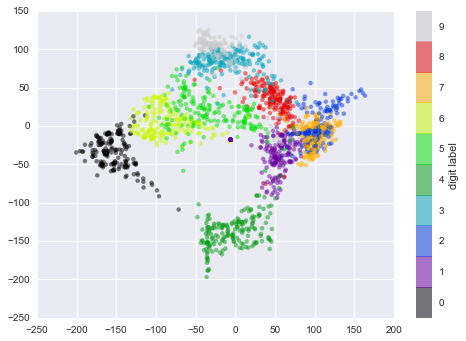

In [14]:
#We will plot the 2D data onto a scatter plot for EDA
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

### Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [39]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=6)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a simple logistic regression which (despite its confusing name) is a classification algorithm:

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.95777777777777773

So using the **Logestic Regression** Classification Algorithm, we were able to predict the values of the digits **95.77%** of the time, but this doesn't tell us where the aroithm has gne wrong, for that we will use Confused Matrix to find the solution'

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  1  0  2  1]
 [ 0  0 50  1  0  0  0  0  0  0]
 [ 0  0  2 36  0  0  0  0  0  2]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  1  0]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  0  0  0 42  1  1]
 [ 0  1  1  0  0  0  0  1 36  0]
 [ 0  1  0  1  0  1  0  0  0 32]]


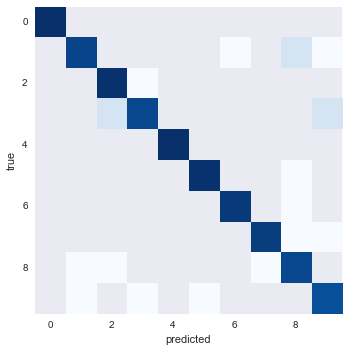

In [43]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

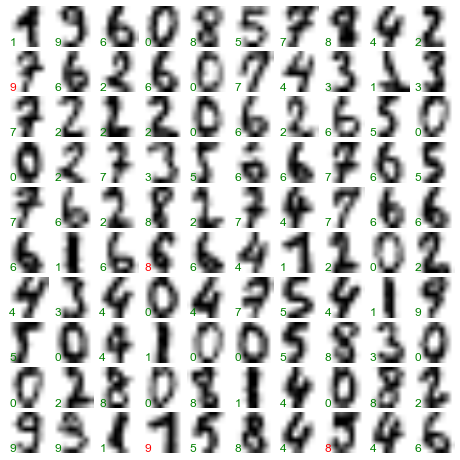

In [44]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# Conclusion

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!
Next time, we will experiment this dataset with some other unsupervised algorithm